# How Linear Regression model Works

Using formula = **Y = mx + c**

In [58]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## Preparing and Loading data

In [59]:
# parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splittng data into various sets

Splitting into training and testing datasets

In [60]:
# create train/test split

trainSplit = int(0.8 * len(X))
XTrain, yTrain = X[:trainSplit], y[:trainSplit]
XTest, yTest = X[trainSplit:], y[trainSplit:]

In [61]:
len(XTrain), len(yTrain), len(XTest), len(yTest)

(40, 40, 10, 10)

#### Visualizing data

In [62]:
def plotPredictions(trainData=XTrain, trainLabel = yTrain, testData = XTest, testLabel = yTest, predictions = None):
    '''
        Plots training data, test data and compares predictions.

    '''
    plt.subplots(figsize=(10,5))
    
    # Plot training data in blue
    plt.scatter(trainData,trainLabel,c="b",s=4,label="Training data")
    
    # Plot testing data in green
    plt.scatter(testData,testLabel,c="g",s=4,label="Testing data")
    
    if predictions is not None:
        # Plot the predictions
        plt.scatter(testData, predictions, c="r",s=4,label="Predictions")
    
    # SHow legends
    plt.legend(prop={"size":14});

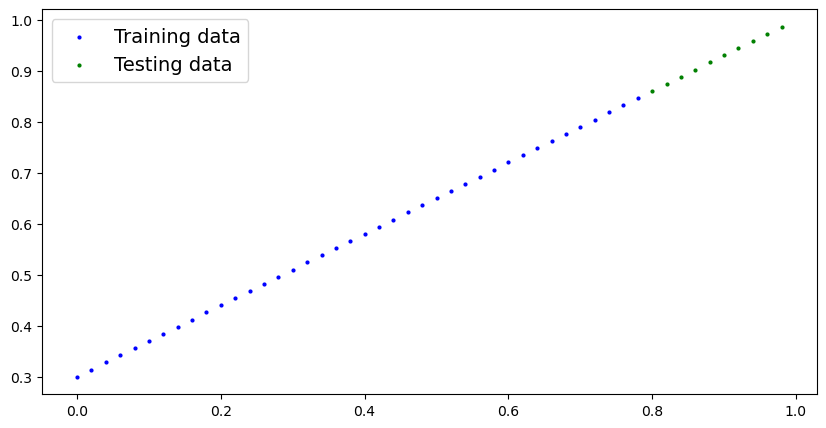

In [63]:
plotPredictions()

## Build model

A linear regression model

The model does the following:
* Starts with random parameters
* Checks data and adjusts parameters until it reaches an ideal value. How? Through either **gradient descent** or **backpropagation**



In [64]:
# Create a linear regression model

class TimsLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        
    # Computation method in model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear regression formula

## Checking our Model

Checking our model parameters

In [65]:
torch.manual_seed(42)

modelZero = TimsLinearRegressionModel()
list(modelZero.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [66]:
modelZero.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###  Making predictions using torch.inference_mode()

In [67]:
with torch.inference_mode():
    yPreds = modelZero(XTest)
    
yPreds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

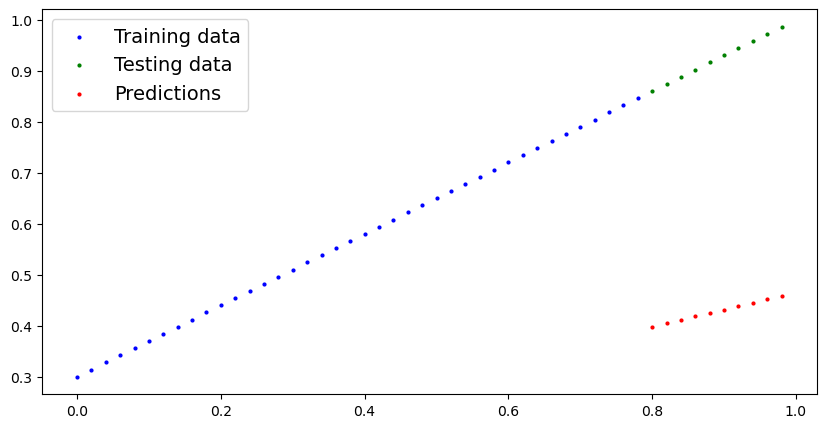

In [68]:
plotPredictions(predictions=yPreds)

## Training Model

Training a loss function and optimizer

In [69]:
list(modelZero.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
modelZero.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [71]:
# Setup Loss function as Mean Absolute Error
lossFn = nn.L1Loss()

# Setup Stochastic gradient descent as optimizer
optim = torch.optim.SGD(params=modelZero.parameters(), lr=0.01)

### Building a training and testing loop:

In [72]:
torch.manual_seed(42)

epochs = 200

# Log of important model values
epochCount = []
lossValues = []
testLossValues = []


for epoch in range(epochs):
    # set the model to training mode
    modelZero.train()
    
    # Forward propagation
    yPred = modelZero(XTrain)
    
    # calculate loss
    loss = lossFn(yPred, yTrain)
    
    # Optimize to zero
    optim.zero_grad()
    
    # Backpropagation wrt model parameters
    loss.backward()
    
    # Gradient descent
    optim.step()
    
        
    # testing mode
    modelZero.eval()
    with torch.inference_mode():
        # Forward press
        testPred = modelZero(XTest)
            
        # Calculate the loss
        testLoss = lossFn(testPred,yTest)
        
    if epoch % 20 == 0:
        print(f"Epoch : {epoch}, loss : {loss}, test loss : {testLoss}")
        
        epochCount.append(epoch)
        lossValues.append(loss)
        testLossValues.append(testLoss)
        
    print(modelZero.state_dict())

Epoch : 0, loss : 0.31288138031959534, test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
OrderedDict([('weights', tensor([0.3874])), ('bias', 

In [73]:
with torch.inference_mode():
    yPredsNew = modelZero(XTest)

In [74]:
modelZero.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

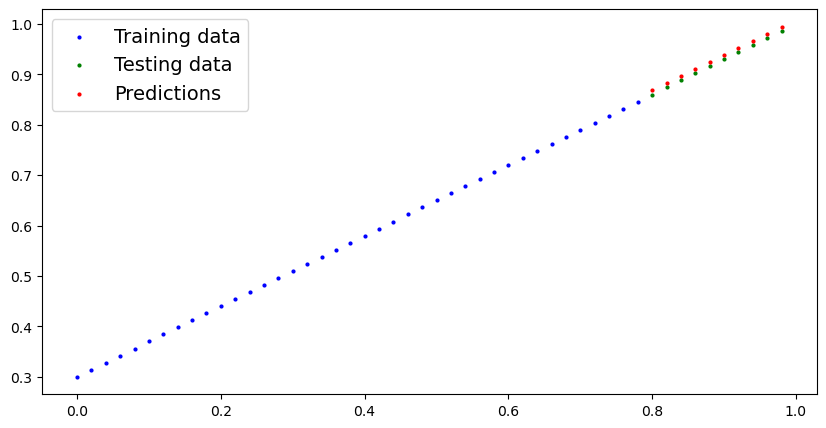

In [75]:
plotPredictions(predictions=yPredsNew)

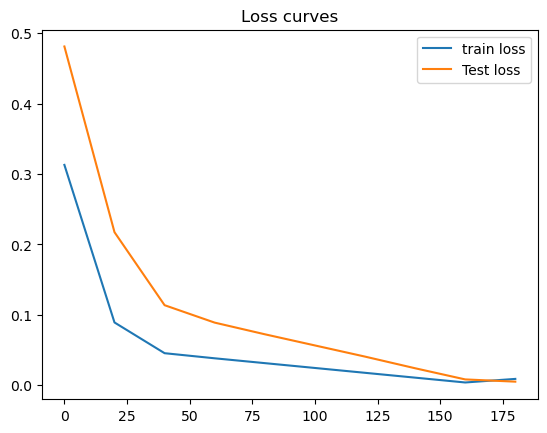

In [76]:
# Plot loss curves
plt.plot(epochCount, torch.tensor(lossValues).numpy(), label="train loss")
plt.plot(epochCount, torch.tensor(testLossValues).numpy(), label="Test loss")
plt.title("Loss curves")
plt.legend();

## Saving model state_dict in PyTorch (Recommended)

In [77]:
from pathlib import Path

# Model directory
MODELPATH = Path("models")
MODELPATH.mkdir(parents=True, exist_ok=True)

# Model Save path
MODELNAME = 'pytorch_modelzero.pth'
MODELSAVEPATH = MODELPATH/MODELNAME

# Save model state_dict
torch.save(obj=modelZero.state_dict(), f=MODELSAVEPATH)

## Loading a Pytorch Model state_dict

In [78]:
loadedModelZero = TimsLinearRegressionModel()

# Load the state_dict
loadedModelZero.load_state_dict(torch.load(f=MODELSAVEPATH))

<All keys matched successfully>

In [79]:
loadedModelZero.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [80]:
# Making predictions with loaded model
loadedModelZero.eval()
with torch.inference_mode():
    loadedModelPreds = loadedModelZero(XTest)
loadedModelPreds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [81]:
#Checking if both the previous and loaded models give the same predictions
yPredsNew == loadedModelPreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

using the cpu
OrderedDict([('linearLayer.weight', tensor([[0.7645]])), ('linearLayer.bias', tensor([0.8300]))])
loss : 0.5362791419029236, test_loss:0.5180275440216064
loss : 0.30585944652557373, test_loss:0.24860787391662598
loss : 0.07543967664241791, test_loss:0.020811820402741432
loss : 0.03257066011428833, test_loss:0.07348296046257019
loss : 0.025652553886175156, test_loss:0.05899869278073311
loss : 0.01878773607313633, test_loss:0.04314061254262924
loss : 0.01191691868007183, test_loss:0.027282554656267166
loss : 0.005045297089964151, test_loss:0.010737675242125988
loss : 0.007889917120337486, test_loss:0.0076562464237213135
loss : 0.007889917120337486, test_loss:0.0076562464237213135


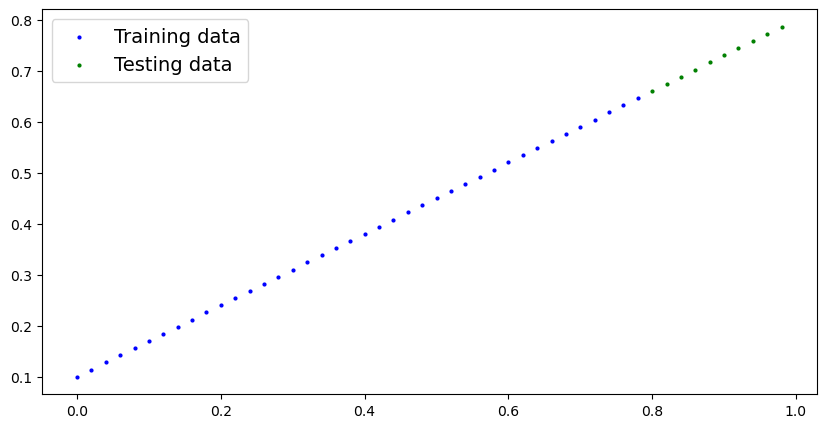

In [125]:
import torch 
from torch import nn
from matplotlib import pyplot as plt

# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"using the {device}")

# Create data 
weights = 0.1
bias = 0.1

start = 0
end = 1
step = 0.02

# X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

trainSplit = int(0.8 * len(X))
XTrain, yTrain = X[:trainSplit], y[:trainSplit]

XTest, yTest = X[trainSplit:], y[trainSplit:]

plotPredictions(XTrain, yTrain, XTest, yTest)


# Create linear model
class TimLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # use nn.linear() for model parameters
        self.linearLayer = nn.Linear(in_features=1,out_features=1)
    
    def forward(self, x : torch.Tensor) -> torch.Tensor :
        return self.linearLayer(x)
    
torch.manual_seed(42)
modelOne = TimLinearRegressionModel()
print(modelOne.state_dict())

modelOne.to(device)

# Training
# Setup Loss function

lossFn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=modelOne.parameters(), lr=0.01)

torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    modelOne.train()
    
    yPred = modelOne(XTrain)
    
    loss = lossFn(yPred, yTrain)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    # Testing
    modelOne.eval()
    with torch.inference_mode():
        testPred = modelOne(XTest)
        
        testLoss = lossFn(testPred, yTest)
        
    if (epoch+1) % 20 == 0:
        print(f"loss : {loss}, test_loss:{testLoss}")

In [126]:
modelOne.state_dict()

OrderedDict([('linearLayer.weight', tensor([[0.6919]])),
             ('linearLayer.bias', tensor([0.0995]))])

In [127]:
modelOne.eval()

with torch.inference_mode():
    yPreds = modelOne(XTest)
yPreds

tensor([[0.6531],
        [0.6669],
        [0.6807],
        [0.6946],
        [0.7084],
        [0.7223],
        [0.7361],
        [0.7499],
        [0.7638],
        [0.7776]])

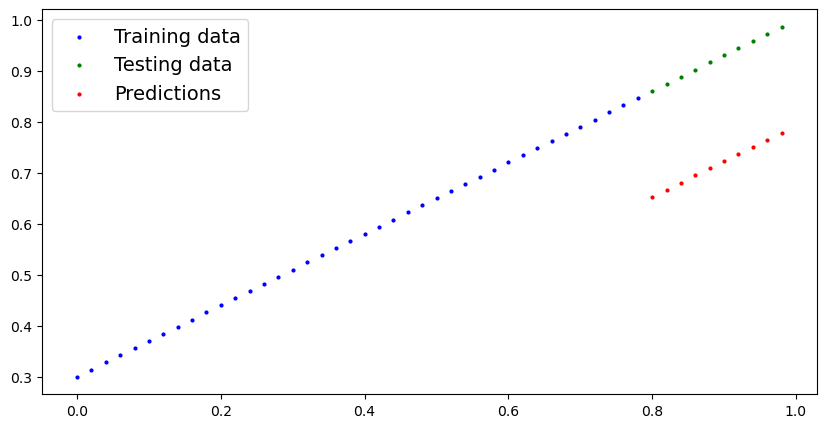

In [128]:
plotPredictions(predictions=yPreds)